In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset
from datetime import datetime, timedelta

In [11]:
df =pd.read_csv('../Data/bank_data_C.csv')
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.0
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.0
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.0
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.0
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,08/04/1990,M,NEW DELHI,7635.19,18/09/2016,184824,799.0
1041610,T1048564,C6459278,20/02/1992,M,NASHIK,27311.42,18/09/2016,183734,460.0
1041611,T1048565,C6412354,18/05/1989,M,HYDERABAD,221757.06,18/09/2016,183313,770.0
1041612,T1048566,C6420483,30/08/1978,M,VISAKHAPATNAM,10117.87,18/09/2016,184706,1000.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   TransactionID       1041614 non-null  object 
 1   CustomerID          1041614 non-null  object 
 2   CustomerDOB         1041614 non-null  object 
 3   CustGender          1041614 non-null  object 
 4   CustLocation        1041614 non-null  object 
 5   CustAccountBalance  1041614 non-null  float64
 6   TransactionDate     1041614 non-null  object 
 7   TransactionTime     1041614 non-null  int64  
 8   TransactionAmount   1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [13]:
df.describe(include='all')


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,07/08/2016,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


### DATA CLEANING

In [14]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount'],
      dtype='object')

In [15]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format= "%d/%m/%Y")
df['TransactionDate'] =pd.to_datetime(df['TransactionDate'], format= "%d/%m/%Y")


In [16]:
df.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,NaN,3,9275,NaN,NaN,NaN,NaN
top,T1,C5533885,NaN,M,MUMBAI,NaN,NaN,NaN,NaN
freq,1,6,NaN,760978,101997,NaN,NaN,NaN,NaN
mean,NaN,NaN,1975-06-19 06:47:20.104683840,NaN,NaN,1.149986e+05,2016-08-25 04:47:02.533492224,1.571221e+05,1.566096e+03
min,NaN,NaN,1800-01-01 00:00:00,NaN,NaN,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,0.000000e+00
25%,NaN,NaN,1980-07-20 00:00:00,NaN,NaN,4.728140e+03,2016-08-12 00:00:00,1.240410e+05,1.600000e+02
50%,NaN,NaN,1987-04-03 00:00:00,NaN,NaN,1.676852e+04,2016-08-25 00:00:00,1.642470e+05,4.575000e+02
75%,NaN,NaN,1991-02-24 00:00:00,NaN,NaN,5.742885e+04,2016-09-06 00:00:00,2.000220e+05,1.200000e+03
max,NaN,NaN,2029-12-19 00:00:00,NaN,NaN,1.150355e+08,2016-10-21 00:00:00,2.359590e+05,1.560035e+06


In [17]:
df[df['CustAccountBalance'] == 0].value_counts().sum()

np.int64(2612)

In [18]:
df[df['TransactionAmount'] == 0].value_counts().sum()

np.int64(820)

In [19]:
df=df[df['TransactionAmount'] != 0]
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


### EXPLORATORY DATA ANALYSIS (EDA)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1040794 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   TransactionID       1040794 non-null  object        
 1   CustomerID          1040794 non-null  object        
 2   CustomerDOB         1040794 non-null  datetime64[ns]
 3   CustGender          1040794 non-null  object        
 4   CustLocation        1040794 non-null  object        
 5   CustAccountBalance  1040794 non-null  float64       
 6   TransactionDate     1040794 non-null  datetime64[ns]
 7   TransactionTime     1040794 non-null  int64         
 8   TransactionAmount   1040794 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.4+ MB


In [21]:
df.isnull().sum()

TransactionID         0
CustomerID            0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

### CATEGORICAL FEATURES

In [23]:
df['CustomerID'].nunique()

878763

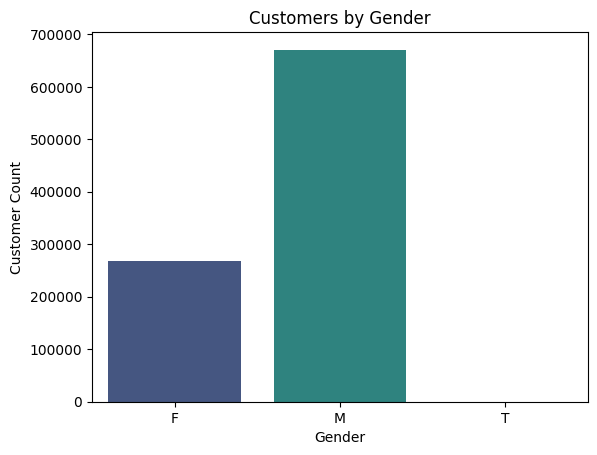

In [24]:
gender_cust= df.groupby('CustGender')['CustomerID'].nunique().reset_index(name='count')
sns.barplot(data = gender_cust, x='CustGender', y='count', hue='CustGender', palette='viridis')
plt.title("Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Customer Count")
plt.show()


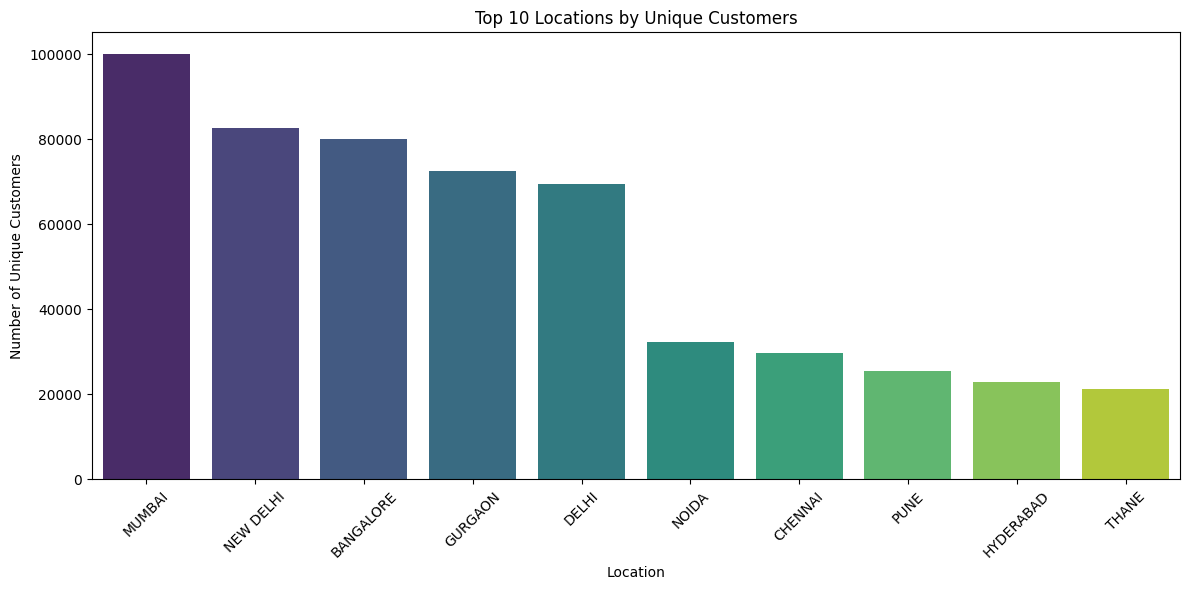

In [25]:

top_locations = df.groupby('CustLocation')['CustomerID'].nunique().sort_values(ascending=False).head(10)
top_locations_df = top_locations.reset_index()
top_locations_df.columns = ['CustLocation', 'UniqueCustomerCount']
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations_df, x='CustLocation', y='UniqueCustomerCount', hue ='CustLocation', palette='viridis')
plt.title('Top 10 Locations by Unique Customers')
plt.xlabel('Location')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


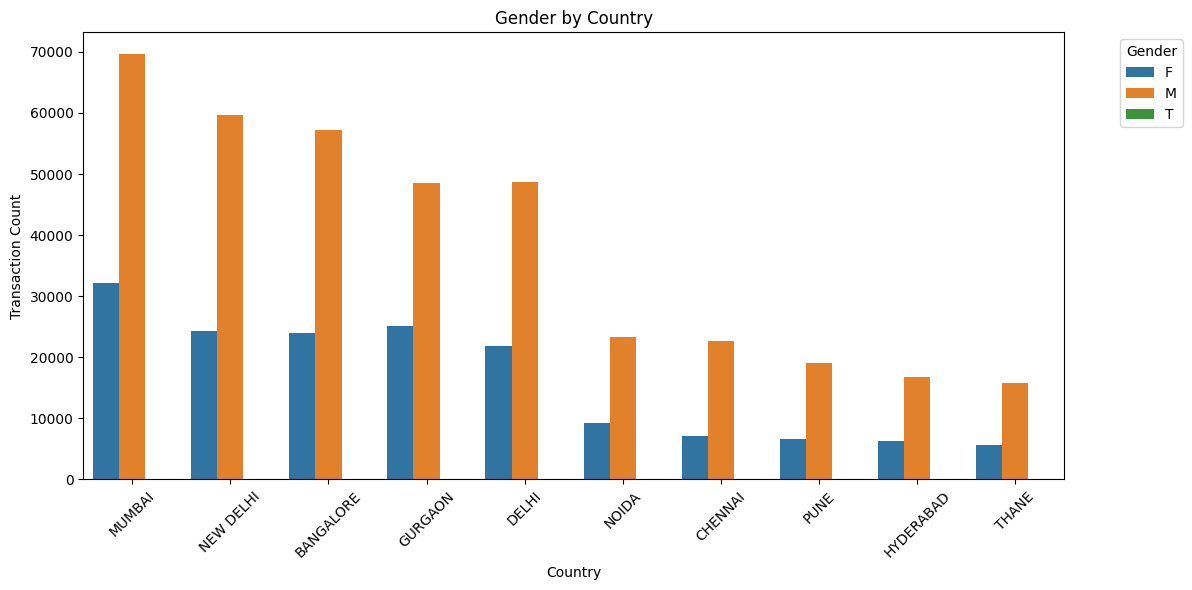

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CustLocation', hue='CustGender', order=df['CustLocation'].value_counts().head(10).index)
plt.xticks(rotation=45)
plt.title("Gender by Country")
plt.xlabel("Country")
plt.ylabel("Transaction Count")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NUMERICAL FEATURES

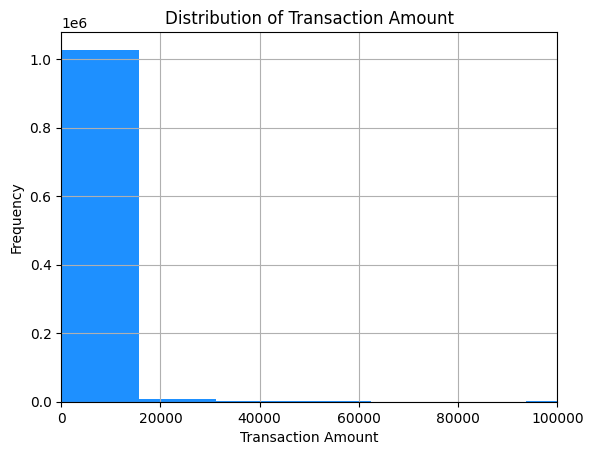

In [27]:
df['TransactionAmount'].hist(bins=100, color='dodgerblue')
plt.xlim(0, 100000) 
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: >

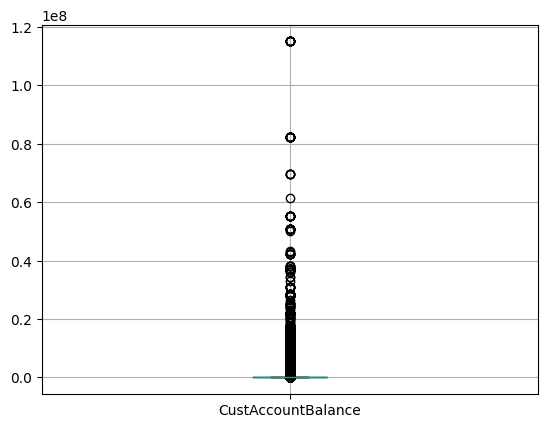

In [28]:
df.boxplot(column='CustAccountBalance')

Transaction Frequency per Month

C:\Users\enita\AppData\Local\Temp\ipykernel_26848\3609352269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M').astype(str)


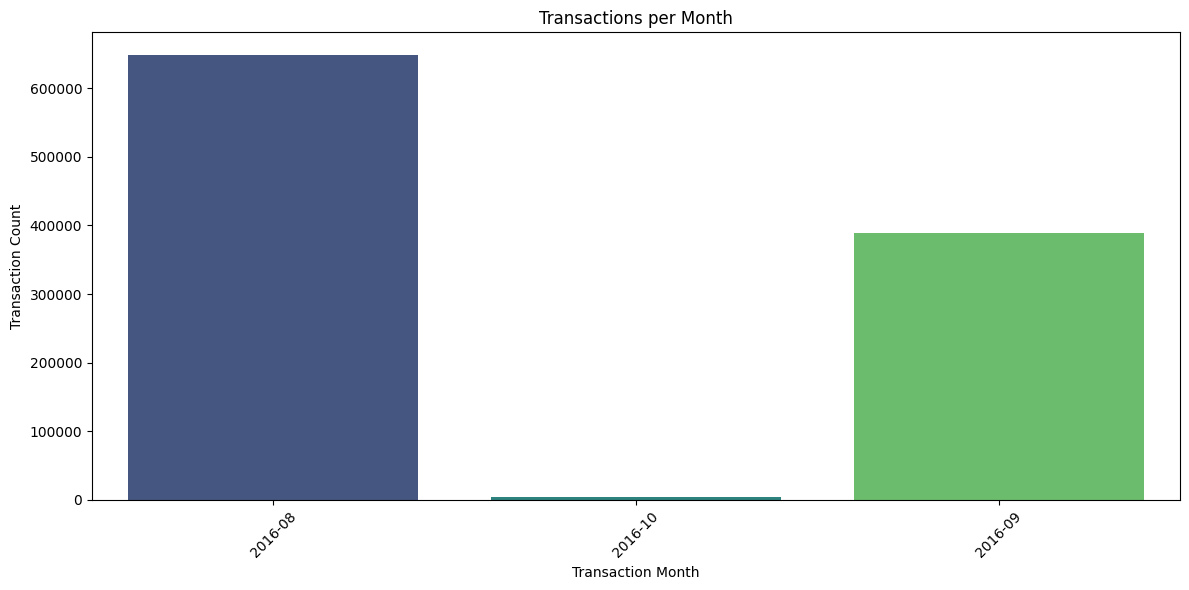

In [29]:
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M').astype(str)
# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='TransactionMonth', hue='TransactionMonth', palette='viridis')
plt.title('Transactions per Month')
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
print(f"The last transaction date is : {df['TransactionDate'].min()}")
print(f"The firsttransaction date is : {df['TransactionDate'].max()}")

The last transaction date is : 2016-08-01 00:00:00
The firsttransaction date is : 2016-10-21 00:00:00


In [31]:
print(f"Minimum DOB is: {df['CustomerDOB'].min()}")
print(f"Maximum DOB is: {df['CustomerDOB'].max()}")

Minimum DOB is: 1800-01-01 00:00:00
Maximum DOB is: 2029-12-19 00:00:00


In [32]:
df.groupby('CustomerDOB')['CustomerID'].nunique()

CustomerDOB
1800-01-01    55524
1930-01-01        1
1930-01-10        2
1930-02-01        7
1930-02-15       11
              ...  
2029-08-15        2
2029-09-23        2
2029-10-29        3
2029-11-27        1
2029-12-19        1
Name: CustomerID, Length: 17231, dtype: int64

In [33]:
df.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,TransactionMonth
count,1040794,1040794,1040794,1040794,1040794,1.040794e+06,1040794,1.040794e+06,1.040794e+06,1040794
unique,1040794,878763,NaN,3,9271,NaN,NaN,NaN,NaN,3
top,T1,C1736254,NaN,M,MUMBAI,NaN,NaN,NaN,NaN,2016-08
freq,1,6,NaN,760310,101918,NaN,NaN,NaN,NaN,648694
mean,NaN,NaN,1975-06-23 14:01:03.602211424,NaN,NaN,1.149199e+05,2016-08-25 04:48:33.720102400,1.571710e+05,1.567330e+03,NaN
min,NaN,NaN,1800-01-01 00:00:00,NaN,NaN,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,1.000000e-02,NaN
25%,NaN,NaN,1980-07-21 00:00:00,NaN,NaN,4.728540e+03,2016-08-12 00:00:00,1.241032e+05,1.614700e+02,NaN
50%,NaN,NaN,1987-04-03 00:00:00,NaN,NaN,1.676385e+04,2016-08-25 00:00:00,1.643050e+05,4.589000e+02,NaN
75%,NaN,NaN,1991-02-24 00:00:00,NaN,NaN,5.739893e+04,2016-09-06 00:00:00,2.000278e+05,1.200000e+03,NaN
max,NaN,NaN,2029-12-19 00:00:00,NaN,NaN,1.150355e+08,2016-10-21 00:00:00,2.359590e+05,1.560035e+06,NaN


In [34]:
#data = df[df['CustomerDOB'] != '1800-01-01 00:00:00'].copy()	
#data

Fix DOB after  the Transaction date

In [35]:
# Identify the placeholder date
invalid_dob = pd.Timestamp('1800-01-01 00:00:00')

# Calculate median of valid dates
median_dob = df.loc[df['CustomerDOB'] != invalid_dob, 'CustomerDOB'].median()

# Replace invalid dates with the median
df.loc[df['CustomerDOB'] == invalid_dob, 'CustomerDOB'] = median_dob

In [36]:
df.loc[df['CustomerDOB'] > df['TransactionDate'], 'CustomerDOB'] -= DateOffset(years=100)

Calculating Age 

In [37]:
df['CustomerAge'] =(df['TransactionDate'] - df['CustomerDOB']).dt.days //365
df

C:\Users\enita\AppData\Local\Temp\ipykernel_26848\1414022828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerAge'] =(df['TransactionDate'] - df['CustomerDOB']).dt.days //365


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,TransactionMonth,CustomerAge
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,2016-08,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,2016-08,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,2016-08,19
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,2016-08,42
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,2016-08,28
...,...,...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,2016-09,26
1041610,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,2016-09,24
1041611,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,2016-09,27
1041612,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,2016-09,38


In [38]:
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,CustomerAge
count,1040794,1.040794e+06,1040794,1.040794e+06,1.040794e+06,1.040794e+06
mean,1985-08-03 11:14:46.951308352,1.149199e+05,2016-08-25 04:48:33.720102400,1.571710e+05,1.567330e+03,3.058251e+01
min,1918-05-03 00:00:00,0.000000e+00,2016-08-01 00:00:00,0.000000e+00,1.000000e-02,0.000000e+00
25%,1982-07-19 00:00:00,4.728540e+03,2016-08-12 00:00:00,1.241032e+05,1.614700e+02,2.500000e+01
50%,1987-09-14 00:00:00,1.676385e+04,2016-08-25 00:00:00,1.643050e+05,4.589000e+02,2.800000e+01
75%,1991-02-23 00:00:00,5.739893e+04,2016-09-06 00:00:00,2.000278e+05,1.200000e+03,3.400000e+01
max,2016-02-22 00:00:00,1.150355e+08,2016-10-21 00:00:00,2.359590e+05,1.560035e+06,9.800000e+01
std,NaN,8.464375e+05,NaN,5.122954e+04,6.563901e+03,8.548019e+00


Age Distribution

Text(0.5, 1.0, 'Age distribution')

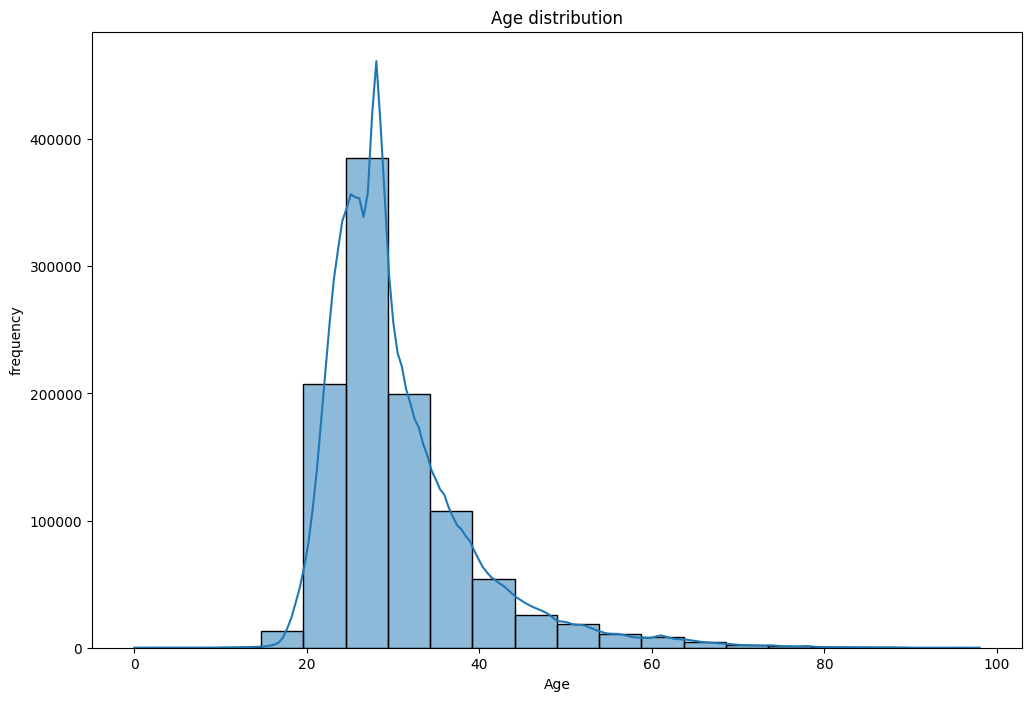

In [39]:
plt.figure(figsize=(12, 8))
sns.histplot(df['CustomerAge'], bins =20, kde=True)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age distribution')

In [40]:
cust = df.groupby('CustomerAge')['CustomerID'].nunique().reset_index(name='Count')
cust

,CustomerAge,Count
0,0,6
1,1,23
2,2,19
3,3,18
4,4,28
...,...,...
92,92,3
93,93,9
94,95,22
95,96,9


In [41]:
df[df['CustomerAge'] == 28]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,TransactionMonth,CustomerAge
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.50,2016-08,28
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-08-02,192825,833.00,2016-08,28
11,T12,C6939838,1988-07-07,M,GUNTUR,14613.46,2016-08-02,205108,202.00,2016-08,28
16,T17,C1376215,1987-09-14,M,MUMBAI,77495.15,2016-08-01,124727,1423.11,2016-08,28
22,T23,C7018081,1987-09-14,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-08-03,104718,110.00,2016-08,28
...,...,...,...,...,...,...,...,...,...,...,...
1041562,T1048516,C6034970,1988-03-01,M,NEW DELHI,4746.96,2016-09-18,185616,240.00,2016-09,28
1041564,T1048518,C3541869,1987-10-18,F,NEW DELHI,46245.41,2016-09-18,185632,20000.00,2016-09,28
1041567,T1048521,C8417820,1987-11-14,M,GURGAON,6221.27,2016-09-18,184747,165.00,2016-09,28
1041584,T1048538,C9016563,1987-12-27,M,SHILLLONG,1002.96,2016-09-18,183747,1146.65,2016-09,28


### Feature Engineering

In [42]:
avg_txn =df.groupby('CustomerID')['TransactionAmount'].mean().rename('AvgTransactionAmount')
avg_txn

CustomerID
C1010011    2553.0
C1010012    1499.0
C1010014     727.5
C1010018      30.0
C1010024    5000.0
             ...  
C9099836     691.0
C9099877     222.0
C9099919     126.0
C9099941      50.0
C9099956     855.0
Name: AvgTransactionAmount, Length: 878763, dtype: float64

In [43]:
numerical = ['CustAccountBalance', 'TransactionTime', 'TransactionAmount', 'CustomerAge']

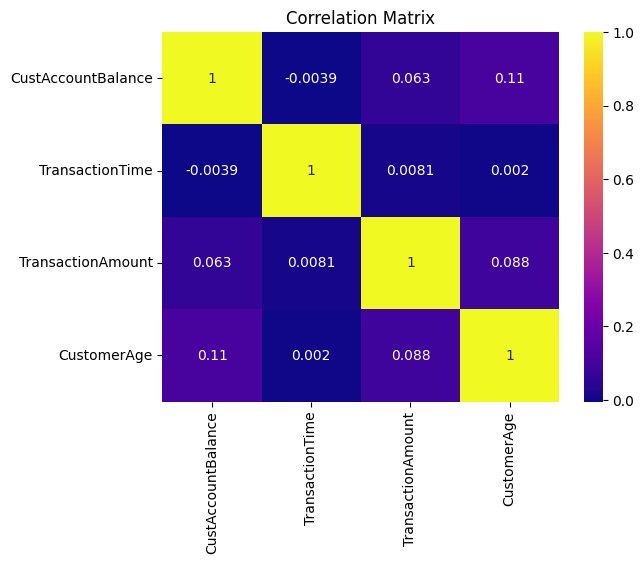

In [44]:
sns.heatmap(df[numerical].corr(), annot=True, cmap='plasma')
plt.title("Correlation Matrix")
plt.show()

No strong correlations among these variables.

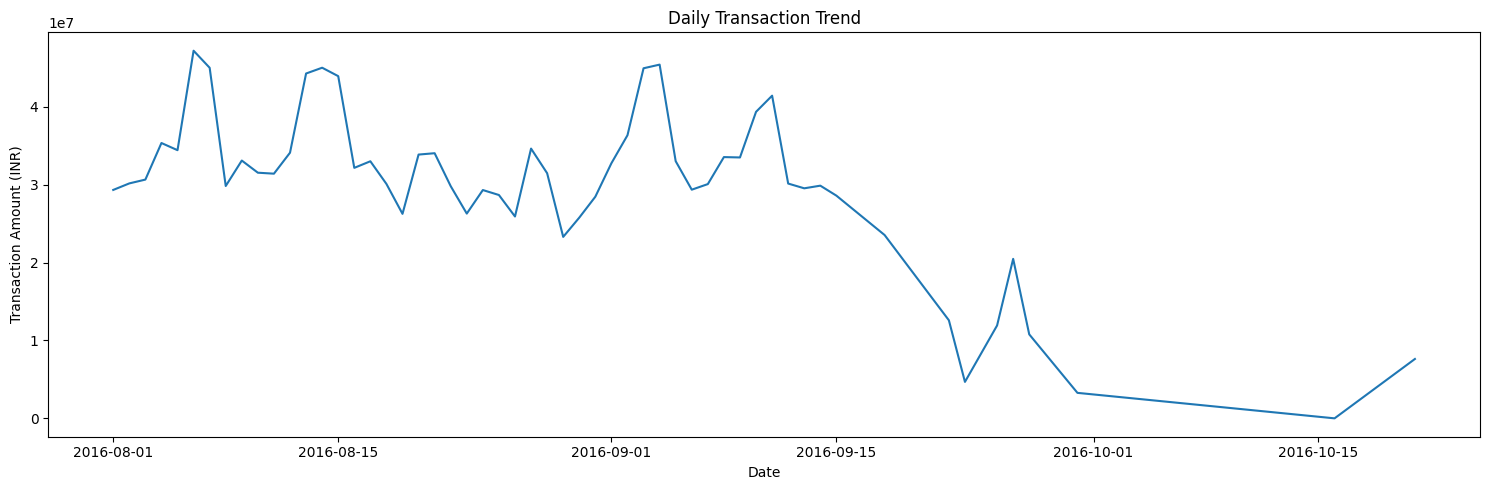

In [45]:
# Daily sales trend
daily_transaction = df.groupby(df['TransactionDate'].dt.date)['TransactionAmount'].sum()
plt.figure(figsize=(15, 5))
daily_transaction.plot()
plt.title('Daily Transaction Trend')
plt.xlabel('Date')
plt.ylabel('Transaction Amount (INR)')
plt.tight_layout()
plt.show()

In [69]:
analysis_date = df['TransactionDate'].max() + timedelta(days=1)
    
    # Calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
  'TransactionDate': lambda x: (analysis_date - x.max()).days,  # Recency
 'TransactionID': 'count',  # Frequency
'TransactionAmount': 'sum'  # Monetary
    }).reset_index()
    
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm


,CustomerID,Recency,Frequency,Monetary
0,C1010011,26,2,5106.0
1,C1010012,69,1,1499.0
2,C1010014,76,2,1455.0
3,C1010018,37,1,30.0
4,C1010024,65,1,5000.0
...,...,...,...,...
878758,C9099836,76,1,691.0
878759,C9099877,37,1,222.0
878760,C9099919,65,1,126.0
878761,C9099941,55,1,50.0


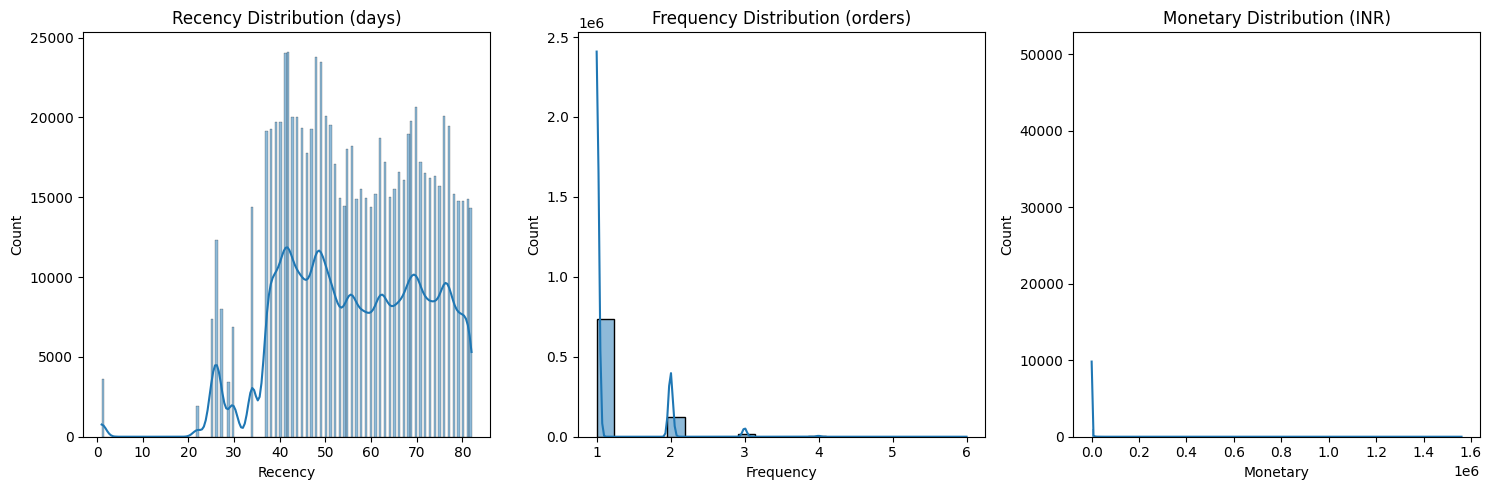

In [47]:
# Visualize RFM distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True)
plt.title('Recency Distribution (days)')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True)
plt.title('Frequency Distribution (orders)')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True)
plt.title('Monetary Distribution (INR)')
plt.tight_layout()
plt.show()

Removing Outiers

In [48]:
    # Remove outliers
for col in ['Recency', 'Frequency', 'Monetary']:
    q1 = rfm[col].quantile(0.25) 
    q3 = rfm[col].quantile(0.75)
    iqr = q3 - q1
    rfm2 = rfm[(rfm[col] >= q1 - 1.5*iqr) & (rfm[col] <= q3 + 1.5*iqr)]
    rfm2

In [49]:
rfm2

,CustomerID,Recency,Frequency,Monetary
1,C1010012,69,1,1499.0
2,C1010014,76,2,1455.0
3,C1010018,37,1,30.0
5,C1010028,54,1,557.0
6,C1010031,79,2,1864.0
...,...,...,...,...
878758,C9099836,76,1,691.0
878759,C9099877,37,1,222.0
878760,C9099919,65,1,126.0
878761,C9099941,55,1,50.0


In [70]:
 #Create quartiles for each metric
    # Note: For recency, lower is better (1 = most recent, 5 = least recent)
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
    
    # For frequency and monetary, higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
    
    # Calculate overall RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
    
    # Calculate a numeric RFM score for easier segmentation
rfm['RFM_Score_Numeric'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Score_Numeric
0,C1010011,26,2,5106.0,5,5,5,555,15
1,C1010012,69,1,1499.0,2,1,4,214,7
2,C1010014,76,2,1455.0,1,5,4,154,10
3,C1010018,37,1,30.0,5,1,1,511,7
4,C1010024,65,1,5000.0,2,1,5,215,8
...,...,...,...,...,...,...,...,...,...
878758,C9099836,76,1,691.0,1,5,3,153,9
878759,C9099877,37,1,222.0,5,5,2,552,12
878760,C9099919,65,1,126.0,2,5,1,251,8
878761,C9099941,55,1,50.0,3,5,1,351,9


CUSTOMER SEGMENTATION

In [73]:
#Champions: Recent customers with high frequency and high monetary value
rfm.loc[rfm['RFM_Score_Numeric'] >= 13, 'Customer_Segment'] = 'Champions'
    
    # Loyal Customers: Recent customers with medium-high frequency and monetary value
rfm.loc[(rfm['RFM_Score_Numeric'] >= 10) & (rfm['RFM_Score_Numeric'] < 13), 'Customer_Segment'] = 'Loyal Customers'
    
    # Potential Loyalists: Recent customers with medium frequency and monetary value
rfm.loc[(rfm['F_Score'] >= 3) & (rfm['R_Score'] >= 4) & (rfm['RFM_Score_Numeric'] < 10), 'Customer_Segment'] = 'Potential Loyalists'
    
    # At Risk: Less recent customers with high frequency and monetary value
rfm.loc[(rfm['R_Score'] <= 2) & (rfm['F_Score'] >= 4) & (rfm['M_Score'] >= 4), 'Customer_Segment'] = 'At Risk'
    
    # Needs Attention: Recent customers with low frequency and monetary value
rfm.loc[(rfm['R_Score'] >= 4) & (rfm['F_Score'] <= 2) & (rfm['M_Score'] <= 2), 'Customer_Segment'] = 'Needs Attention'
    
    # New Customers: Very recent customers with low frequency
rfm.loc[(rfm['R_Score'] == 5) & (rfm['F_Score'] == 1), 'Customer_Segment'] = 'New Customers'
    
    # About to Sleep: Less recent customers with low frequency and monetary value
rfm.loc[(rfm['R_Score'] <= 3) & (rfm['F_Score'] <= 2) & (rfm['M_Score'] <= 3), 'Customer_Segment'] = 'About to Sleep'
    
    # Dormant: Not recent customers with low frequency and monetary value
rfm.loc[(rfm['R_Score'] == 1) & (rfm['F_Score'] == 1), 'Customer_Segment'] = 'Dormant'
    
    # High-Value: Less recent customers with high monetary value
rfm.loc[(rfm['R_Score'] <= 3) & (rfm['M_Score'] == 5), 'Customer_Segment'] = 'High Value'
    
    # Assign remaining customers to 'Others' category
rfm.loc[rfm['Customer_Segment'] == 'NAN', 'Customer_Segment'] = 'Others'

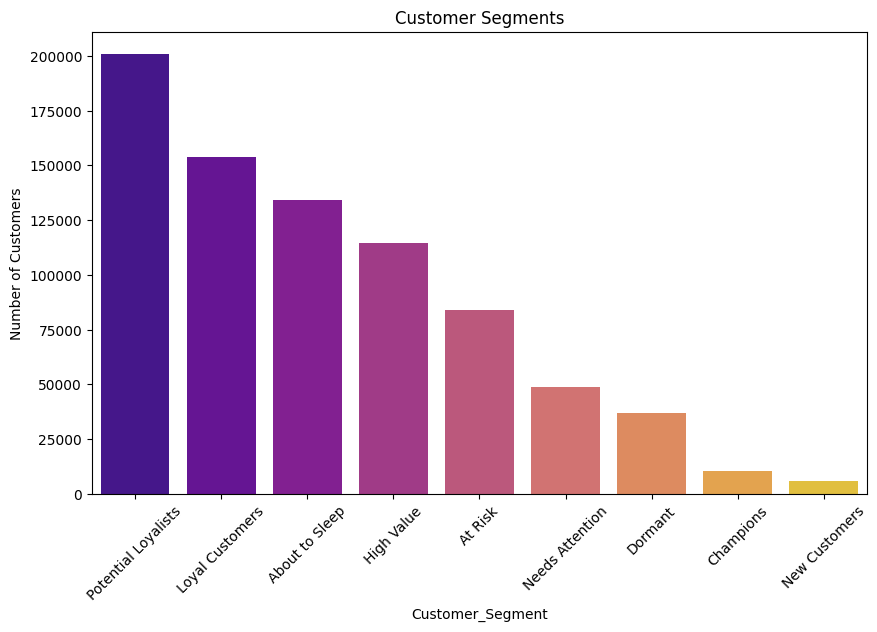

In [74]:
#Visualize segments
plt.figure(figsize=(10, 6))
segment_counts = rfm['Customer_Segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values, hue=segment_counts.index, palette='plasma')
plt.title('Customer Segments')
plt.xticks(rotation=45)
plt.ylabel('Number of Customers')
plt.show()

In [75]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Score_Numeric,Customer_Segment
0,C1010011,26,2,5106.0,5,5,5,555,15,High Value
1,C1010012,69,1,1499.0,2,1,4,214,7,NaN
2,C1010014,76,2,1455.0,1,5,4,154,10,Loyal Customers
3,C1010018,37,1,30.0,5,1,1,511,7,About to Sleep
4,C1010024,65,1,5000.0,2,1,5,215,8,NaN
...,...,...,...,...,...,...,...,...,...,...
878758,C9099836,76,1,691.0,1,5,3,153,9,Potential Loyalists
878759,C9099877,37,1,222.0,5,5,2,552,12,Loyal Customers
878760,C9099919,65,1,126.0,2,5,1,251,8,Potential Loyalists
878761,C9099941,55,1,50.0,3,5,1,351,9,Potential Loyalists


### KMEANS CLUSTERING

In [ ]:
rfm_data=rfm2.copy()
rfm_data.drop(columns='CustomerID', inplace=True)


In [79]:
test =rfm.copy()
test.drop(columns='CustomerID', inplace=True)

In [80]:
test = test[['Recency', 'Frequency', 'Monetary']]

In [81]:
test

,Recency,Frequency,Monetary
0,26,2,5106.0
1,69,1,1499.0
2,76,2,1455.0
3,37,1,30.0
4,65,1,5000.0
...,...,...,...
878758,76,1,691.0
878759,37,1,222.0
878760,65,1,126.0
878761,55,1,50.0


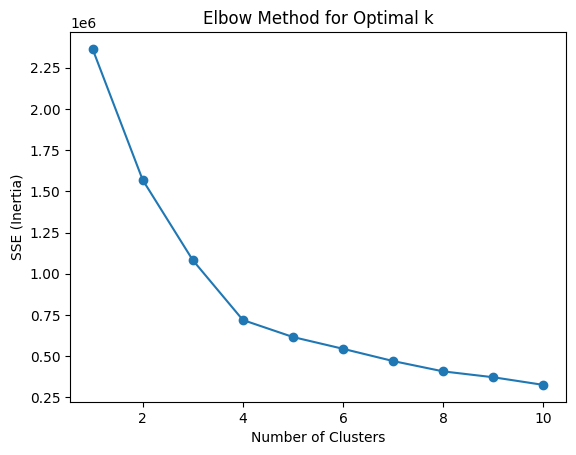

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Elbow method
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)

# Plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [86]:
# Choose the optimal number of clusters (say k=4)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
rfm_scaled2 = scaler.fit_transform(test)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled2)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Score_Numeric,Customer_Segment,Cluster
0,C1010011,26,2,5106.0,5,5,5,555,15,High Value,1
1,C1010012,69,1,1499.0,2,1,4,214,7,NaN,2
2,C1010014,76,2,1455.0,1,5,4,154,10,Loyal Customers,1
3,C1010018,37,1,30.0,5,1,1,511,7,About to Sleep,0
4,C1010024,65,1,5000.0,2,1,5,215,8,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
878758,C9099836,76,1,691.0,1,5,3,153,9,Potential Loyalists,2
878759,C9099877,37,1,222.0,5,5,2,552,12,Loyal Customers,0
878760,C9099919,65,1,126.0,2,5,1,251,8,Potential Loyalists,2
878761,C9099941,55,1,50.0,3,5,1,351,9,Potential Loyalists,0


In [87]:
rfm.to_csv('../Data/new_rfm.csv')

In [88]:
summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
print(summary)

         Recency  Frequency  Monetary
Cluster                              
0           44.5        1.0    1287.3
1           48.6        2.1    2787.9
2           70.3        1.0    1318.8
3           54.1        1.4   79191.1


In [ ]:
cluster_summary = rfm_data.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
print(cluster_summary)

In [ ]:
# Choose the optimal number of clusters (say k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm2['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [57]:
# Average RFM values per cluster
cluster_summary = rfm_data.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
print(cluster_summary)

         Recency  Frequency  Monetary
Cluster                              
0           70.5        1.0     401.6
1           48.6        2.1    1237.4
2           44.2        1.0     403.7
3           58.7        1.0    2123.5


c:\Users\enita\anaconda3\envs\health\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


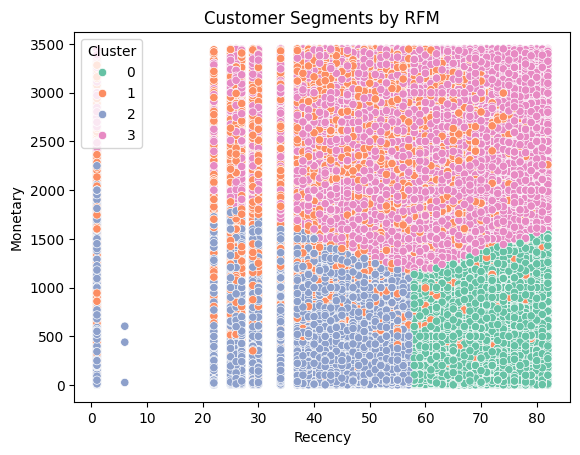

In [58]:
sns.scatterplot(data=rfm_data, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title('Customer Segments by RFM')
plt.show()

In [ ]:

rfm

KeyError: 'CustomerID'

In [ ]:
rfm.merge(rfm2, how='inner', on='CustomerID')


,CustomerID,Recency_x,Frequency_x,Monetary_x,R_Score,F_Score,M_Score,RFM_Score,RFM_Score_Numeric,Customer_Segment,Recency_y,Frequency_y,Monetary_y,Cluster
0,C1010011,26,2,5106.0,5,5,5,555,15,High Value,NaN,NaN,NaN,NaN
1,C1010012,69,1,1499.0,2,1,4,214,7,NaN,69.0,1.0,1499.0,3.0
2,C1010014,76,2,1455.0,1,5,4,154,10,Loyal Customers,76.0,2.0,1455.0,1.0
3,C1010018,37,1,30.0,5,1,1,511,7,About to Sleep,37.0,1.0,30.0,2.0
4,C1010024,65,1,5000.0,2,1,5,215,8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878758,C9099836,76,1,691.0,1,5,3,153,9,Potential Loyalists,76.0,1.0,691.0,0.0
878759,C9099877,37,1,222.0,5,5,2,552,12,Loyal Customers,37.0,1.0,222.0,2.0
878760,C9099919,65,1,126.0,2,5,1,251,8,Potential Loyalists,65.0,1.0,126.0,0.0
878761,C9099941,55,1,50.0,3,5,1,351,9,Potential Loyalists,55.0,1.0,50.0,2.0


In [65]:
rfm.to_csv('../Data/rfm.csv')